In [1]:
# Add Matplotlib inline
%matplotlib inline
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read the city file and store in Dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read ride file and store in Dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get the number of not null rows
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# Get the number of not null rows
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# Get the data types of columns
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [11]:
# Get unique values of type of city
city_data_df.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
# Get the number of data points from Urban cities
sum(city_data_df.type == 'Urban')

66

In [13]:
# Get the number of data points from type of city
city_data_df.type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [15]:
# Get number of not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Get the that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# Get the data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
# Merge dataframes into 1
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city', 'city'], how='left')
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [18]:
# Create Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df.type == 'Urban']
urban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [20]:
# Create Suburban city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df.type == 'Suburban']
suburban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
1630,East Marymouth,2019-03-29 08:36:20,37.60,6370863861570,5,Suburban
1631,New Raymond,2019-02-25 21:40:18,20.44,5984505117874,17,Suburban
1632,Lake Robertside,2019-01-11 20:17:36,46.51,6574333011308,4,Suburban
1633,Josephside,2019-03-30 09:45:11,44.74,5592692102803,25,Suburban
1634,Brandonfort,2019-01-14 12:35:27,28.02,8100258078935,10,Suburban


In [21]:
# Create rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df.type == 'Rural']
rural_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
2255,Taylorhaven,2019-04-06 01:01:29,45.31,2275364435623,1,Rural
2256,Garzaport,2019-02-18 18:27:48,36.16,2928337561347,7,Rural
2257,New Ryantown,2019-01-27 17:33:41,42.68,7994603753131,2,Rural
2258,Lake Latoyabury,2019-04-02 21:00:22,13.46,8232864757802,2,Rural
2259,North Holly,2019-02-16 17:02:51,39.46,4571476032148,8,Rural


In [22]:
# Get the number of rides in Urban
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
East Kaylahaven    29
Erikaland          12
Grahamburgh        25
Huntermouth        24
Hurleymouth        28
Name: ride_id, dtype: int64

In [23]:
# Get the number of rides in Suburban and rural 
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [25]:
# Get the average fare for city in urban
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [26]:
# Get the average fare for city in suburban and rural
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [27]:
# Get the average number of drivers for urban
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [28]:
# Get the average number of drivers for suburban and rural
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

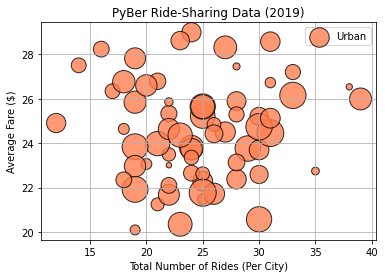

In [34]:
# Build scatter plot for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10 * urban_driver_count,
            c='coral',
            edgecolors='black',
            linewidths=1,
            alpha=0.8,
            label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

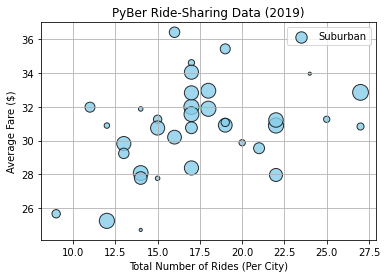

In [35]:
# Build scatter plot for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10 * suburban_driver_count,
            c='skyblue',
            edgecolor='black',
            linewidths=1,
            alpha=0.8,
            label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

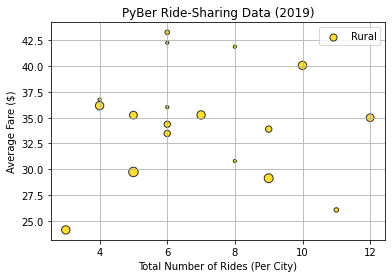

In [36]:
# Build scatter plot for rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10 * rural_driver_count,
            c='gold',
            edgecolors='black',
            linewidths=1,
            alpha=0.8,
            label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

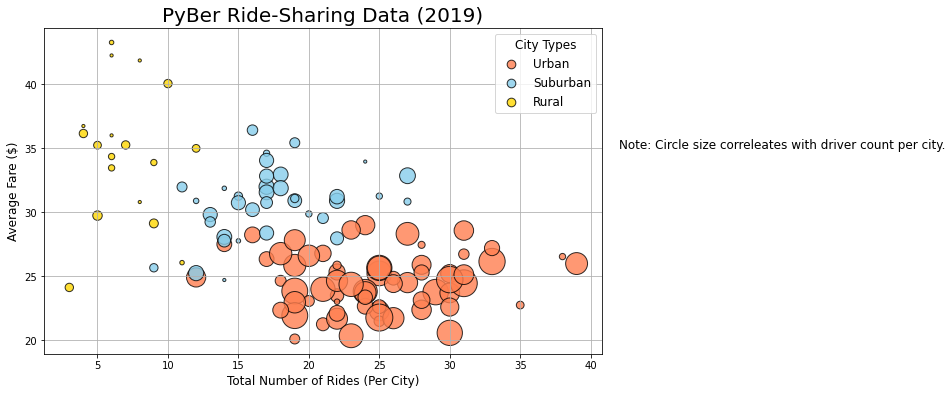

In [45]:
# Add the scatter charts for each type of city
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10 * urban_driver_count,
            c='coral',
            edgecolors='black',
            linewidths=1,
            alpha=0.8,
            label='Urban')

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10 * suburban_driver_count,
            c='skyblue',
            edgecolor='black',
            linewidths=1,
            alpha=0.8,
            label='Suburban')

plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10 * rural_driver_count,
            c='gold',
            edgecolors='black',
            linewidths=1,
            alpha=0.8,
            label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.grid(True)

#Create legend
lgnd = plt.legend(fontsize='12', mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# text label about circle size
plt.text(42, 35,'Note: Circle size correleates with driver count per city.', fontsize='12')

# Save the figure
plt.savefig('Resources/Analysis/Fig1.png')

# Show the plot
plt.show()